In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [10]:
data = pd.read_csv("features_data.csv")
data.head()

,class,fold,salience,amplitude_envelope,root_mean_square,zero_crossing_rate,mfcc,spectral_centroid,bandwidth
0,dog_bark,5,1,2.501107,0.859733,0.701485,1114.7451,11002.153867,9055.166227
1,children_playing,5,1,0.207636,0.076948,2.715422,5759.2744,38984.715069,35987.449939
2,children_playing,5,1,0.141984,0.056998,1.999477,6220.2430,33621.214468,35413.731359
3,children_playing,5,1,0.254567,0.092671,2.646289,5578.5050,41672.174391,41306.245923
4,children_playing,5,1,0.154707,0.060585,2.300883,6048.3857,36180.503459,35524.610921


In [11]:
label_encoder = preprocessing.LabelEncoder()

### Encode category labels

In [12]:
data['class'] = label_encoder.fit_transform(data['class'])
data.head()

,class,fold,salience,amplitude_envelope,root_mean_square,zero_crossing_rate,mfcc,spectral_centroid,bandwidth
0,3,5,1,2.501107,0.859733,0.701485,1114.7451,11002.153867,9055.166227
1,2,5,1,0.207636,0.076948,2.715422,5759.2744,38984.715069,35987.449939
2,2,5,1,0.141984,0.056998,1.999477,6220.2430,33621.214468,35413.731359
3,2,5,1,0.254567,0.092671,2.646289,5578.5050,41672.174391,41306.245923
4,2,5,1,0.154707,0.060585,2.300883,6048.3857,36180.503459,35524.610921


In [13]:
X, y = data.iloc[:, 2:], data.iloc[:, 0]

### Scale values

In [14]:
scaler = MinMaxScaler().fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.head()

,salience,amplitude_envelope,root_mean_square,zero_crossing_rate,mfcc,spectral_centroid,bandwidth
0,0.0,0.132132,0.079255,0.046789,0.089087,0.063560,0.078529
1,0.0,0.010540,0.006809,0.190093,0.551544,0.295723,0.430702
2,0.0,0.007059,0.004963,0.139149,0.597443,0.251223,0.423200
3,0.0,0.013028,0.008264,0.185174,0.533545,0.318020,0.500252
4,0.0,0.007734,0.005295,0.160596,0.580331,0.272457,0.424650


## Przeprowadzenie walidacji krzyżowej

0.39978618764570356

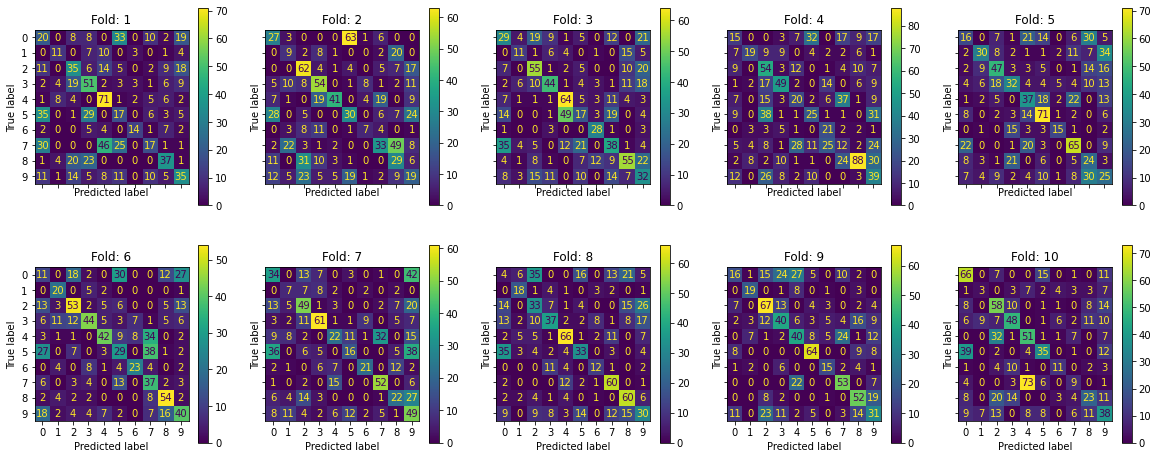

In [15]:
scores = []
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(20, 8))

for i in range(10):
    fold = i + 1

    train, test = data[data['fold'] != fold], data[data['fold'] == fold]
    train_X, train_y = train.iloc[:, 2:], train.iloc[:, 0]
    test_X, test_y = test.iloc[:, 2:], test.iloc[:, 0]

    scaler = MinMaxScaler()
    train_X = pd.DataFrame(scaler.fit_transform(
        train_X), columns=train_X.columns)
    test_X = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)

    classifier = KNeighborsClassifier(19, weights='distance')
    classifier.fit(train_X, train_y)

    scores.append(classifier.score(test_X, test_y))

    ax = axs[0 if i < 5 else 1, i % 5]
    ax.title.set_text(f"Fold: {fold}")

    plot_confusion_matrix(classifier, test_X, test_y, ax=ax)

np.array(scores).mean()
